<a href="https://colab.research.google.com/github/callejero666/avdp/blob/main/Adulto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tecnicatura en desarrollo de software**
**Reyes Rodrigo Ivan**

**Librerías necesarias para trabajar con el dataset de personas adultas que superan los 50k anuales:**
* pandas: Para cargar, manipular y analizar los datos.
* numpy: Para operaciones numéricas.
* matplotliby seaborn: Para visualización de datos.
* sklearn: Para crear y evaluar el modelo de aprendizaje automático.
* zipfile: Para descomprimir el archivo ZIP.
* requests: Para hacer solicitudes HTTP.

In [140]:
# Instalar librerías (si no están preinstaladas)
!pip install pandas numpy scikit-learn matplotlib seaborn


In [141]:
# Importar las librerías necesarias
import pandas as pd            # Para trabajar con los datos
import numpy as np             # Para operaciones numéricas
import matplotlib.pyplot as plt # Para graficar
import seaborn as sns         # Para visualizaciones avanzadas
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.ensemble import RandomForestClassifier   # Para el modelo
from sklearn.metrics import classification_report     # Para la evaluación del modelo
import zipfile                 # Para descomprimir el archivo
import requests
from scipy.stats import mode

**Información general del conjunto de datos: Ingreso anual basado en el Censo de 1994**
Este conjunto de datos, extraído por Barry Becker del Censo de 1994, se utiliza para clasificar si una persona tiene un ingreso anual mayor o menor a $50,000. Incluye información demográfica, educativa y laboral de individuos mayores de 16 años, que trabajaron al menos una hora por semana y cumplen con ciertas condiciones de ingreso y relevancia estadística.

Atributos principales: Edad, clase laboral, educación, ocupación, relación, raza, sexo, horas trabajadas, ganancia/pérdida de capital y país de origen.

In [142]:
import requests

# URL del archivo de datos
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"

# Descargar los datos
data_response = requests.get(url_data)  # Solicitar los datos del archivo adult.data
names_response = requests.get(url_names)  # Solicitar los nombres de las columnas del archivo adult.names

# Guardar los datos y nombres en archivos locales
with open('adult.data', 'wb') as f:
    f.write(data_response.content)  # Guardar los datos en el archivo 'adult.data'

with open('adult.names', 'wb') as f:
    f.write(names_response.content)  # Guardar los nombres de las columnas en el archivo 'adult.names'

# Cargar los datos en un DataFrame de pandas llamado df
df = pd.read_csv('adult.data', header=None)  # Cargar el archivo 'adult.data' en un DataFrame, sin encabezado

# Definir los nombres de las columnas basados en el contenido del archivo 'adult.names'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Asignar los nombres de las columnas al DataFrame
df.columns = column_names

# Ahora, df_cleaned puede ser asignado a df, o se puede realizar una limpieza adicional antes de asignarlo:
df_cleaned = df  # Si no se necesita más limpieza, se asigna el DataFrame limpio a df_cleaned


**Contenido**

Para obtener más información, consulte la fuente original en UCI Machine Learning Repository .

Variables de entrada (atributos):
1.   Edad ( age): Numérica continua.
2.   Clase laboral ( workclass): Tipo de empleo (privado, autónomo, gobierno, etc.).
3.   Peso final del censo ( fnlwgt): Peso estadístico en la población.
4.   Educación ( education): Nivel educativo alcanzado (licenciatura, maestría, etc.).
5.   Años de educación ( education-num): Años de estudio completos.
6.   Estado civil ( marital-status): Estado civil (casado, separado, viudo, etc.).
7.   Ocupación ( occupation): Profesión principal (ventas, transporte, gerencia, etc.).
8.   Relación ( relationship): Relación familiar (esposo, hijo propio, no familiar, etc.).
9.   Raza ( race): Categorías como blanco, negro, asiático, entre otros.
10.  Sexo ( sex): Masculino o Femenino.
11.  Ganancia de capital ( capital-gain): Valor continuo.
12.  Pérdida de capital ( capital-loss): Valor continuo.
13.  Horas por semana ( hours-per-week): Número de horas trabajadas por semana.
14.  País de origen ( native-country): País de nacimiento (Estados Unidos, India, México, etc.).

Variable de salida (etiqueta):
Ingreso ( income): Clasificación binaria:
>50K: Ingreso anual mayor a $50,000.
<=50K: Ingreso anual menor o igual a $50,000.


# Exploración de los datos y validación:
Cantidad de filas y columnas : 32,561 filas y 15 columnas en el conjunto de datos de entrenamiento.

In [143]:
# Imprimir el número de filas y columnas del archivo original
print(f'Filas y Columnas del archivo Original: {df.shape}')


Filas y Columnas del archivo Original: (32561, 15)


In [144]:
# Imprimir el número de filas y columnas después de la limpieza
print(f'Filas y Columnas después de la limpieza: {df_cleaned.shape}')


Filas y Columnas después de la limpieza: (32561, 15)


### Información de las variables

In [145]:
# Imprimir la información del DataFrame original
print("Info DataSet Original")
df.info()


Info DataSet Original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Valores nulos

In [146]:
# imprime si existen valores nulos en el dataset
valores_nulos_por_columna = df.isnull().sum()
print(f"cantidad de valores nulos: \n\n{valores_nulos_por_columna}")

cantidad de valores nulos: 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [147]:
# imprime informacion sobre el dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [148]:
# imprime si existe duplicados
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Filas repetidas

In [149]:
# imprime la cantidad de filas repetidas
print(f"La cantidad de filas repetida es: {df[df.duplicated()].shape[0]}")

La cantidad de filas repetida es: 24


### consulta de los nombres de colummnas
para luego poder consultar por su nombre

In [150]:
# Verificar los nombres de las columnas del DataFrame
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### Variable **occupation**
Exploraremos y analizaremos los datos asociados con nuestra variable objetivo. (la seleccion de variable es a eleccion)

In [151]:
# Contar las frecuencias de la columna '(eleccion)'
print("\nFrecuencias de la columna 'occupation':")
print(df['occupation'].value_counts())


Frecuencias de la columna 'occupation':
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


<Axes: xlabel='occupation', ylabel='count'>

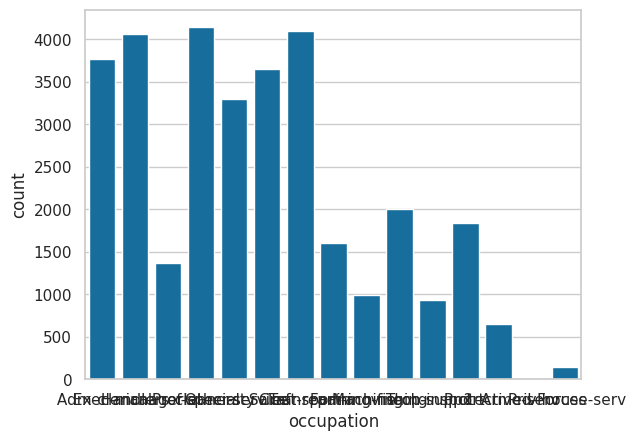

In [152]:
# Establece el estilo y la paleta de colores para las gráficas
sns.set(style="whitegrid", palette="colorblind")
# Crea un gráfico de barras que cuenta las ocurrencias de cada valor en la columna
sns.countplot(data=df, x='occupation')

In [153]:
# Contar las frecuencias de la columna 'income'
print("\nFrecuencias de la columna 'income':")
print(df['income'].value_counts())



Frecuencias de la columna 'income':
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: xlabel='income', ylabel='count'>

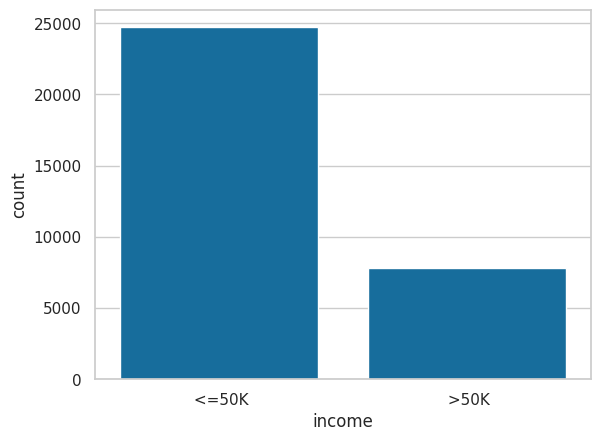

In [154]:
sns.set(style="whitegrid", palette="colorblind")

sns.countplot(data=df, x='income')

### **Análisis del conjunto de datos**

El conjunto de datos analiza características demográficas y laborales para predecir el ingreso anual de las personas.

Dimensiones del conjunto de datos después de la limpieza:
Filas: 32.561.
Columnas: 15.
Frecuencia de la columna income:
La variable objetivo ( income) clasifica los ingresos en dos categorías:

*  <=50K: Representa la mayoría de los casos, con 24.720 registros .
*  >50K: Representa 7.841 registros .

Esto refleja una distribución desbalanceada , donde la mayoría de los ingresos se encuentran en la categoría de $50,000 o menos al año, lo cual podría requerir técnicas específicas para abordar el desbalance en tareas de modelado predictivo.

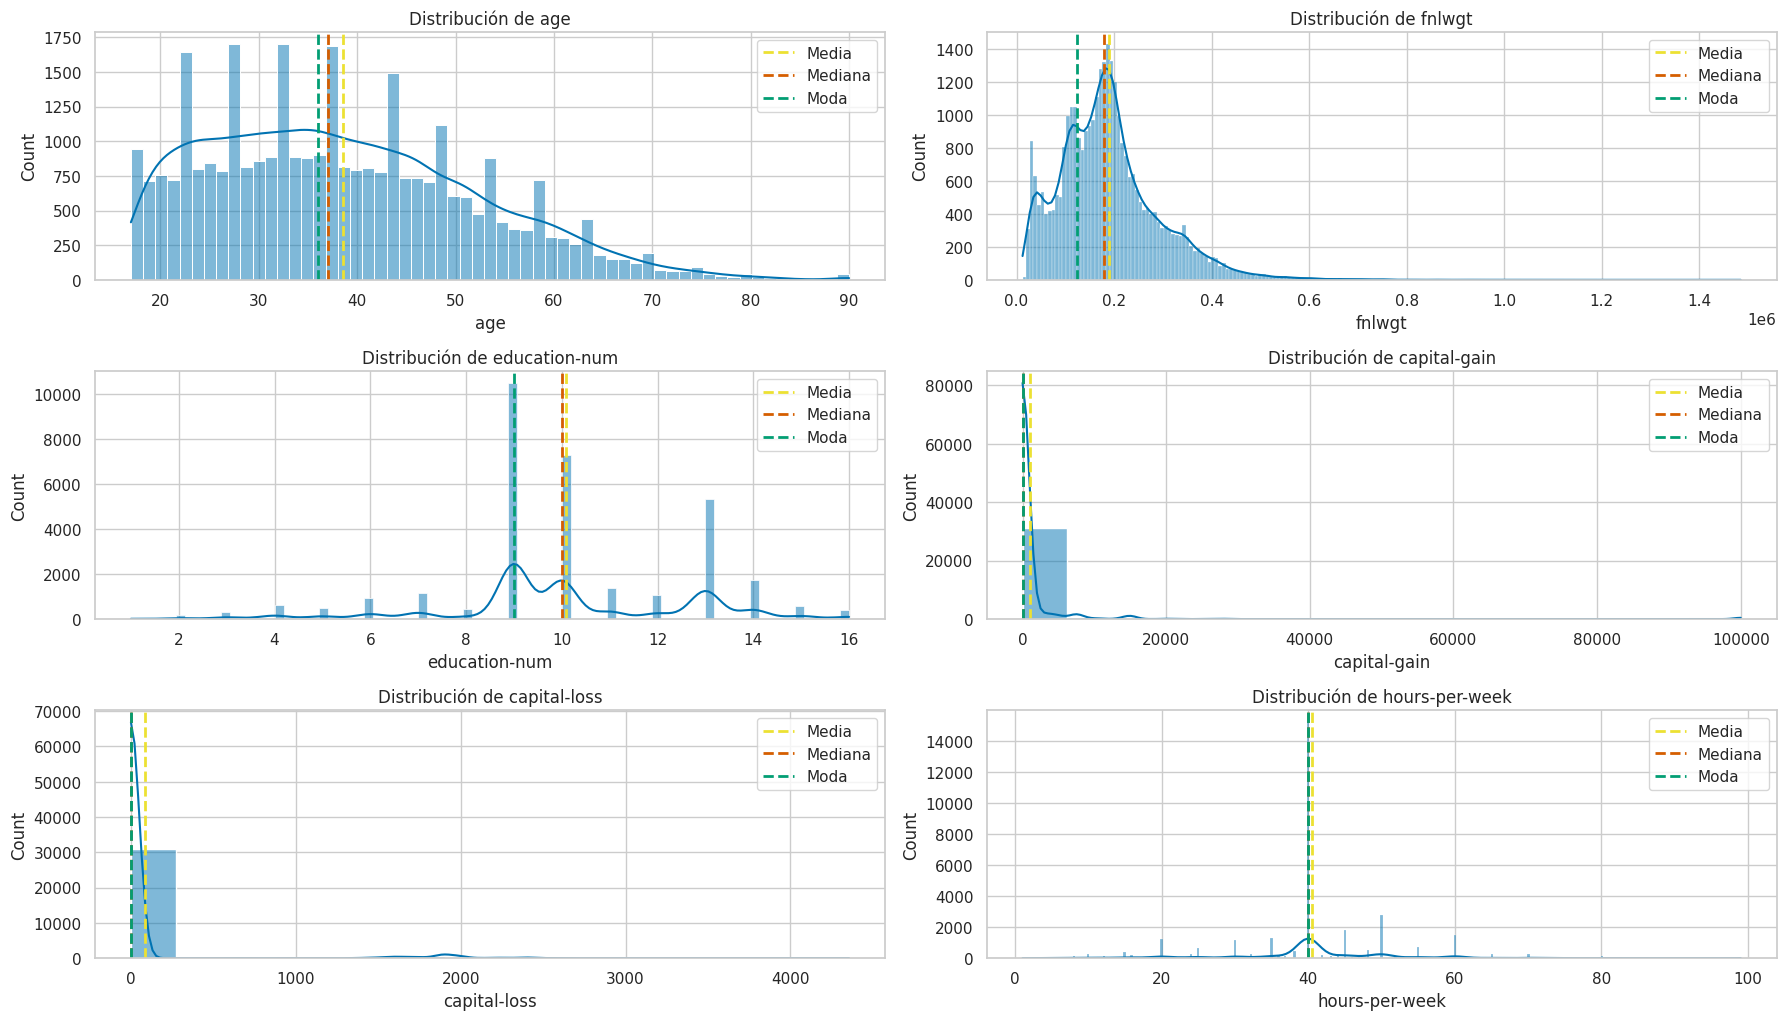

In [155]:
# Filtrar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Lista de las variables numéricas
variables = list(columnas_numericas)

fig = plt.figure(figsize=(18, 20))
for index, variable in enumerate(variables):
    media = df[variable].mean()  # Media
    mediana = df[variable].median()  # Mediana
    moda = mode(df[variable])[0].item()  # Moda

    # Crear un subgráfico para cada variable
    plt.subplot(6, 2, index+1)
    sns.histplot(df[variable], kde=True)  # Crear histograma

    # Agregar líneas para media, mediana y moda
    plt.axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')
    plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')

    # Agregar título y leyenda
    plt.title(f'Distribución de {variable}')
    plt.legend()

# Ajustar el layout para que no se solapen los gráficos
fig.tight_layout(pad=1.0)


### **Preguntas para responder:**
*  ¿Qué factores influyen más en el nivel de ingresos de una persona?

### *Preguntas secundarias:*

*  ¿Cuál es el impacto del nivel educativo en los ingresos anuales?

*  ¿Existe una relación entre las horas trabajadas por semana y el nivel de ingresos?

*  ¿Cómo afecta la ocupación y el estado civil al ingreso anual?

*  ¿Los ingresos varían significativamente según el país de origen o la raza?

*  ¿Qué combinaciones de características (como educación y ocupación) se asocian más frecuentemente con ingresos superiores a $50,000?